## Libraries

In [1]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

## Calculate Basic Statistics Using PROC MEANS

In [2]:
proc means data=Statdata.NormTemp printalltypes 
				maxdec=2 fw=10 printalltypes n mean std q1 q3;
	var BodyTemp;
	id id;
	title 'Selected Descriptive Statistics for Body Temp';
run;

##  Practice: Picturing Your Data


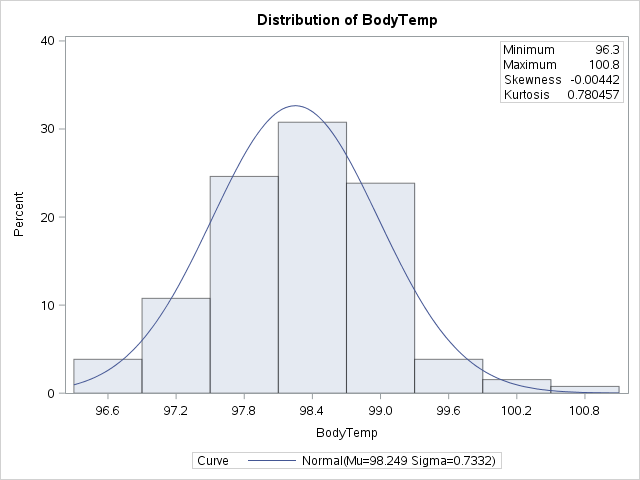
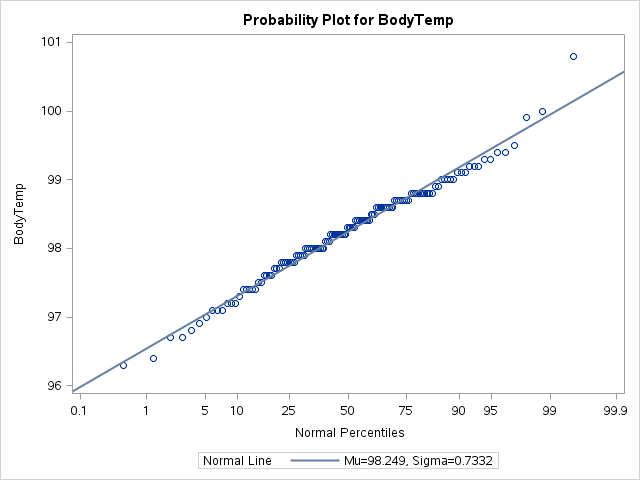
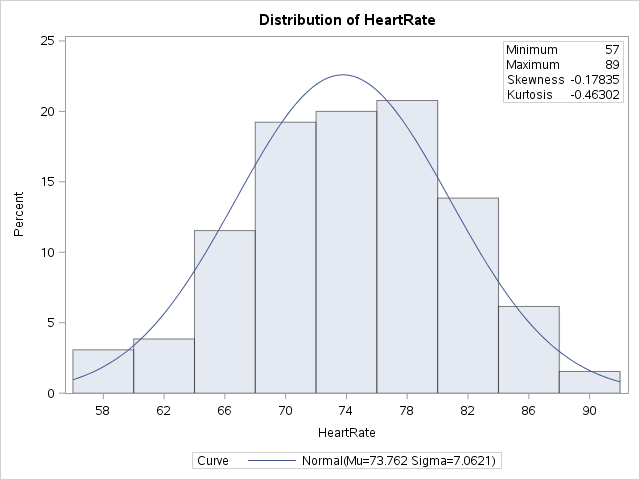
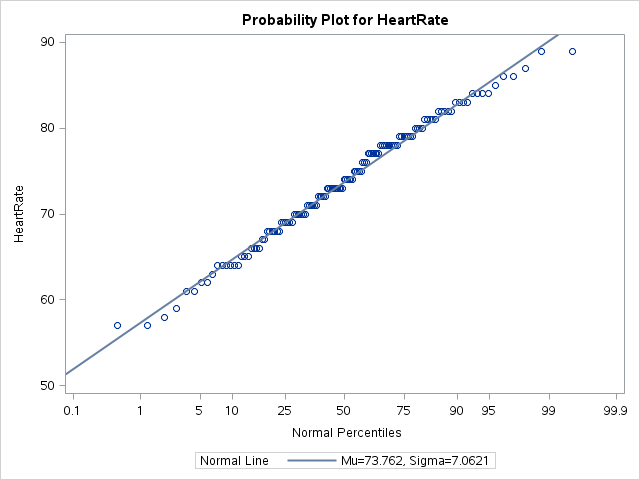

In [3]:
ods graphics on; 
proc univariate data=Statdata.NormTemp; 
	var BodyTemp HeartRate;  
	histogram BodyTemp HeartRate / normal (mu=est sigma=est); 
	inset min max skewness kurtosis / position=ne; 
	probplot BodyTemp HeartRate / normal (mu=est sigma=est); 
	title 'Descriptive Statistics Using PROC UNIVARIATE';
run; 


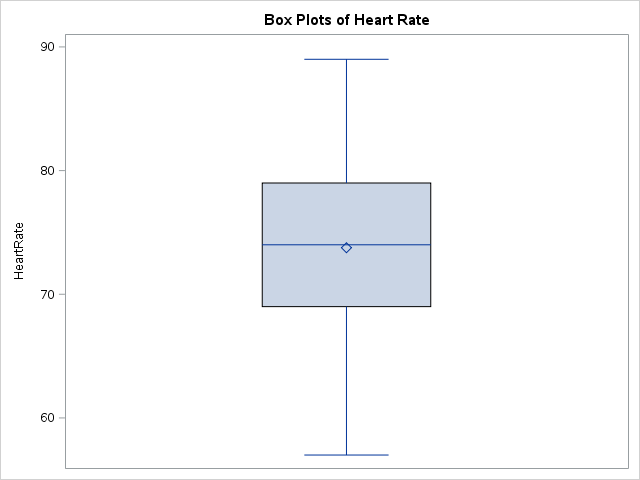

In [4]:
ods graphics on;proc sgplot data=Statdata.NormTemp;  
	vbox HeartRate / datalabel=ID; 
	format ID 3.; 
    title "Box Plots of Heart Rate"; 
run; 


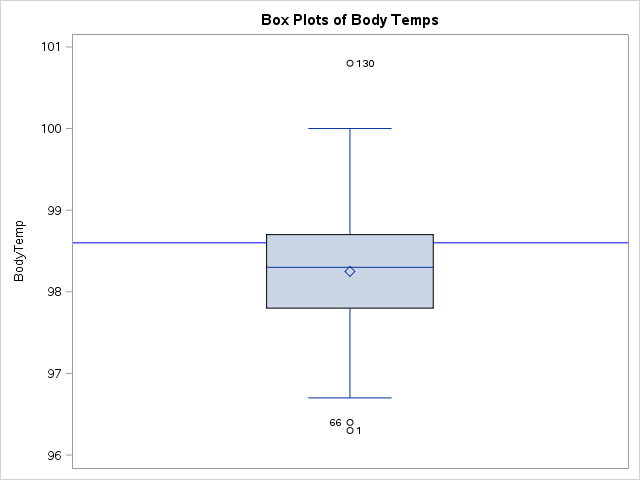

In [5]:
proc sgplot data=Statdata.NormTemp;
    refline 98.6 / axis=y lineattrs=(color=blue);
    vbox BodyTemp / datalabel=ID;
    title "Box Plots of Body Temps";
run;

## Practice: Using PROC MEANS to Generate a 95% Confidence Interval  for the Mean

In [8]:
title 'Confidence Interval for SAT';
proc means data=Statdata.NormTemp maxdec=4 n mean stderr clm;  
	var BodyTemp;  
title;  

### Conclusion: The normality assumption seems to hold because the sample size is  large enough and because the data values seemed to be normally distributed. The 95% confidence interval is 98.12 to 98.38 degrees Fahrenheit. You are 95% confident that the true mean body temperature for the  population of all people in the world is somewhere between 98.12 and  98.38 degrees.

## Using PROC Univariate to Perform a One-Sample t-Test

In [9]:
ods select testsforlocation;  
proc univariate data=Statdata.NormTemp mu0=98.6;  
	var BodyTemp;  
title 'Testing Whether the Mean of Temp = 98.6';  
title;  
run; 

### Ho: mu=98.6  
### Ha: mu != 98.6 

### Conclusion: The value of the t statistic and the corresponding p-value are -5.45  and <.0001 respectively. Because the p-value is less than the stated alpha level of .05,  you do reject the null hypothesis.

In [ ]:
Using PROC TTEST to Compare Means


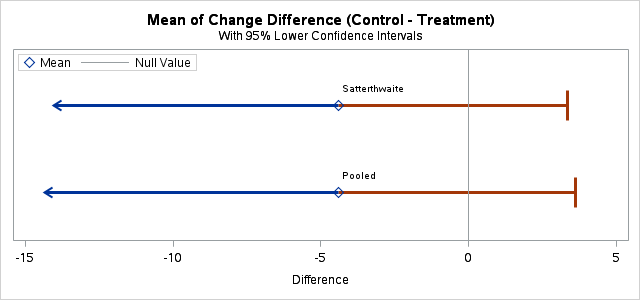

In [11]:
proc ttest data=Statdata.German plots (only shownull)=interval h0=0 sides=L;  
	class Group;  
	var Change;  
title "One—Sided t—test: effectiveness foreign language teaching technique";  
title;  

### Conclusion: Because the p-value for the Equality of Variances test is greater than  the alpha level of 0.05, you do not reject the assumption of equal  variances. The p-value for the Pooled (equal variance) t-test for the  difference between the two means shows that the two groups are not  significantly different. Therefore, you don't have enough evidence to say conclusively that the new teaching technique is better than the old  teaching technique. The Difference Interval Plot displays these conclusions graphically. The Pooled interval includes 0, which indicates a lack of statistical significance.